#  #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

Data Source - https://www.kaggle.com/blastchar/telco-customer-churn

In this project, we will train several classification algorithms such as Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Random Forest Classifier to predict the churn rate of Telecommunication Customers. Machine learning help companies analyze customer churn rate based on several factors such as services subscribed by customers, tenure rate, and payment method. 

#  #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
#!pip install cufflinks
#!pip install jupyterthemes
# Cufflinks is a third-party wrapper library around Plotly

In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
#from jupyterthemes import jtplot # Jupyter theme
#jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [ ]:
# Read the CSV file 
telecom_df=pd.read_csv('../input/telecom-churncsv/telecom_churn.csv')


In [ ]:
# Load the top 5 instances
telecom_df.head()


In [ ]:
# Load the bottom 5 instances 
telecom_df.tail()




In [ ]:
# Check the shape of the dataframe
telecom_df.shape

In [ ]:
# Display the feature columns
telecom_df.columns


In [ ]:
# Obtain the summary of the dataframe
telecom_df.info()

In [ ]:
print(telecom_df['total_day_minutes'].mean(),telecom_df['total_day_minutes'].max())

#  #3: PERFORM DATA VISUALIZATION

In [ ]:
telecom_df.hist(figsize=(20,20))

In [ ]:
telecom_df['class'].value_counts()

In [ ]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig=go.Figure(data= [go.Pie(labels=['Retained(0)','Exited(1)'],values=telecom_df['class'].value_counts())])
fig.show()


In [ ]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig=px.histogram(telecom_df,x='international_plan')
fig.show()


In [ ]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

In [ ]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

In [ ]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

MINI CHALLENGE #3:

- Plot the plotly histogram on voice mail plan correlated with Churn feature

In [ ]:
fig=px.histogram(telecom_df,x='voice_mail_plan',color='class')
fig.show()

# #4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [ ]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y
#telecom_df = pd.concat([telecom_df,pd.get_dummies(telecom_df['state'])],axis = 1)
#telecom_df = telecom_df.drop('state',axis = 1)
X = telecom_df.drop(["class", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

MINI CHALLENGE #4:
- Verify that the train/test split was successfull 

In [ ]:
X_train.shape

In [ ]:
y_train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


In [ ]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescores=pd.concat([dfscores,dfcolumns],axis=1)
featurescores.columns=['Score','Specs']
featurescores.index=featurescores['Specs']
del featurescores['Specs']
featurescores=featurescores.sort_values(by='Score',ascending=False)

featurescores




In [ ]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

#  #5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
model_LR=LogisticRegression(max_iter=5000)
model_LR=CalibratedClassifierCV(model_LR)
model_LR.fit(X_train,y_train)

In [ ]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
y_predict=model_LR.predict(X_test)
print(classification_report(y_test,y_predict))

In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)


Heatmap


In [ ]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko


#  #6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC
model_svm=LinearSVC(max_iter=10000, dual=False)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)


In [ ]:
y_predict=model_svm.predict(X_test)
print(classification_report(y_test,y_predict))

In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko

# TASK #7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf=CalibratedClassifierCV(model_rf)
model_rf.fit(X_train,y_train)
y_predict=model_rf.predict(X_test)
print(classification_report(y_test,y_predict))


In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

In [ ]:
sns.heatmap(cm,annot=True,fmt='g') #fmt to avoid scientific notations , #annot for values karne ko

#  #8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=9)
#model_knn=CalibratedClassifierCV(model_knn)
model_knn.fit(X_train,y_train)
y_predict=model_knn.predict(X_test)
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    #knn=CalibratedClassifierCV(knn)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    print(i,score.mean())
    accuracy_rate.append(score.mean())


#  #9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
y_predict=model_gnb.predict(X_test)
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
print(cm)



#  #10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

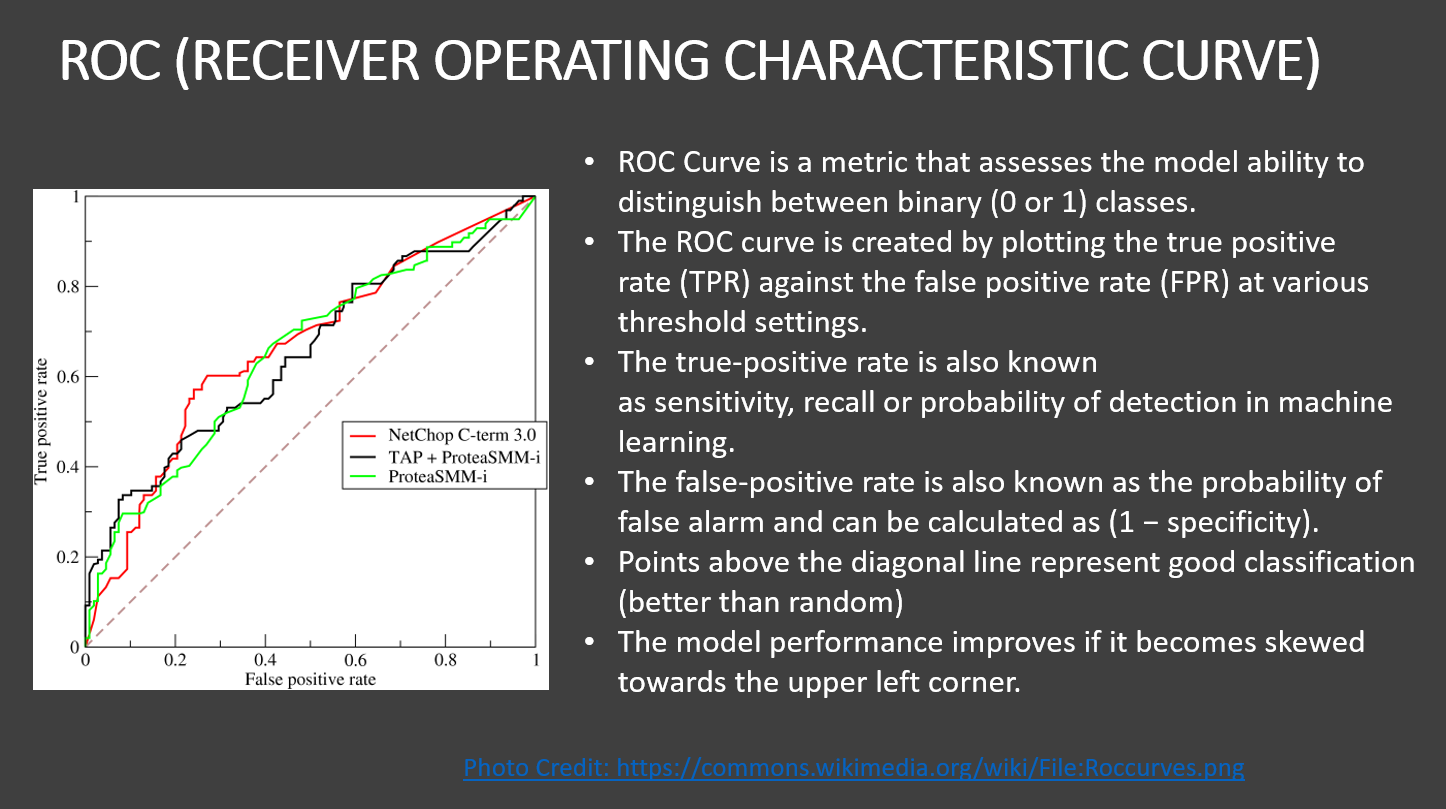

In [ ]:
model_LR.predict_proba(X_test)

In [ ]:
model_LR.predict_proba(X_test)[:, 1]

In [ ]:
y_test

In [ ]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

#  #11: CONCLUSION & PROJECT RECAP

In [ ]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

